# Outlier Detection

In [ ]:
import pandas as pd
import numpy as np

# 1. Z-SCORE METHOD

Using Z score method,we can find out how many standard deviations value away from the mean
If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. It is taken as outliers.

In [ ]:
# Reading the data to a panda dataframe 
df_master = pd.read_csv('Parent_Advertiser_2021.csv')
df_master.head()

,Market,Parent_Advertiser,Metric,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Qtr Total
0,BALTIMORE,2ND SWING GOLF,CY OTB,490.0,2930.00,2910.00,3255.00,2555.0,2685.00,0.0,300.00,0.0,0.0,NaN,NaN,15125.00
1,BALTIMORE,2ND SWING GOLF,PY Pace,1625.0,2500.00,1875.00,2680.00,4245.0,325.00,2670.0,240.00,1050.0,450.0,NaN,NaN,17660.00
2,BALTIMORE,2ND SWING GOLF,% to PY Pace,0.3,1.17,1.55,1.22,0.6,8.26,0.0,1.25,0.0,0.0,NaN,NaN,0.86
3,BALTIMORE,2ND SWING GOLF,PY Final,1625.0,2500.00,1875.00,2680.00,4245.0,325.00,2670.0,240.00,1050.0,450.0,NaN,NaN,17660.00
4,BALTIMORE,2ND SWING GOLF,% to PY Final,0.3,1.17,1.55,1.22,0.6,8.26,0.0,1.25,0.0,0.0,NaN,NaN,0.86


In [ ]:
df_master = df_master.loc[df_master['Metric'] == 'CY OTB']
df_master.head()

,Market,Parent_Advertiser,Metric,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Qtr Total
0,BALTIMORE,2ND SWING GOLF,CY OTB,490.0,2930.0,2910.0,3255.0,2555.0,2685.0,0.0,300.0,0.0,0.0,NaN,NaN,15125.0
5,BALTIMORE,10TH INNING,CY OTB,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,143.0
10,BALTIMORE,A STEP ABOVE THE REST,CY OTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
15,BALTIMORE,AAMCO,CY OTB,3269.0,3293.0,2805.0,3183.0,3225.0,3137.0,4454.0,3672.0,3426.0,5396.0,5390.0,5517.0,46767.0
20,BALTIMORE,ABOUT FACES DAY SPA AND SALON,CY OTB,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [ ]:
# Selecting the outliers who has a Z score greater than 3
outlier_list=[]
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df_master['Qtr Total'])

Outliers: [620934.0, 502448.0, 553939.0, 533506.0, 773295.0, 503307.0, 2573474.0, 717040.0, 622400.0, 563137.0, 818104.0, 883602.0, 1825843.0, 627575.0, 1170300.0, 1284150.0, 906741.0, 555217.0, 1024292.0, 595451.0, 1123654.0, 6869363.0, 1886731.0, 692634.0]


In [ ]:
df_outliers = pd.DataFrame()
for outlier in out:
    #print(df[['Market', 'Parent_Advertiser', 'Qtr Total']].loc[df_master['Qtr Total'] == outlier])
    df_outliers=df_outliers.append(df_master[['Market', 'Parent_Advertiser', 'Qtr Total']].loc[df_master['Qtr Total'] == outlier])

In [ ]:
print(df_outliers)

           Market                     Parent_Advertiser  Qtr Total
1475    BALTIMORE         MARYLAND DEPARTMENT OF HEALTH   620934.0
1605    BALTIMORE     MISSISSIPPI DEPARTMENT OF TOURISM   502448.0
5020    KNOXVILLE            TOYOTA DEALERS ASSOCIATION   553939.0
5685      MEMPHIS                        HOLLYWOOD FEED   533506.0
6215      MEMPHIS            TOYOTA DEALERS ASSOCIATION   773295.0
7995    NASHVILLE                MUSIC CITY PREP CLINIC   503307.0
8865    NASHVILLE            TOYOTA DEALERS ASSOCIATION  2573474.0
9230     RICHMOND                       ALLEN AND ALLEN   717040.0
11060     ROANOKE             HONDA DEALERS ASSOCIATION   622400.0
12570   SALISBURY                       SCHELL BROTHERS   563137.0
13060  WASHINGTON                                 APPLE   818104.0
14115  WASHINGTON                              EMERGENT   883602.0
14235  WASHINGTON                               FH FURR  1825843.0
14455  WASHINGTON                            GIANT FOOD   6275

 # IQR METHOD

In [ ]:
import pandas as pd
import numpy as np

out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df_master['Qtr Total'])

Outliers: [161356.0, 214892.0, 77814.0, 104550.0, 78880.0, 101279.0, 138422.0, 397438.0, 401465.0, 140698.0, 103639.0, 300189.0, 83748.0, 96022.0, 146568.0, 110934.0, 113297.0, 169707.0, 80362.0, 123313.0, 101523.0, 96213.0, 217879.0, 156319.0, 158759.0, 155873.0, 80235.0, 144061.0, 108781.0, 80438.0, 88715.0, 199774.0, 212464.0, 74988.0, 167509.0, 363868.0, 76481.0, 84742.0, 620934.0, 361123.0, 502448.0, 85905.0, 265327.0, 92424.0, 332084.0, 154955.0, 293546.0, 76234.0, 94478.0, 134510.0, 149516.0, 144673.0, 145800.0, 127157.0, 166979.0, 147962.0, 99988.0, 107413.0, 134628.0, 131330.0, 91636.0, 413880.0, 111046.0, 181059.0, 180239.0, 242267.0, 78018.0, 83713.0, 472080.0, 77194.0, 97218.0, 85644.0, 112869.0, 80128.0, 90313.0, 105369.0, 151592.0, 95521.0, 116893.0, 96646.0, 93243.0, 154024.0, 92491.0, 159549.0, 181006.0, 134099.0, 97130.0, 107387.0, 459457.0, 111504.0, 178257.0, 92700.0, 85179.0, 82718.0, 134604.0, 81451.0, 172862.0, 79480.0, 553939.0, 270941.0, 127447.0, 105042.0, 1272

# VISUALIZING THE DATA

1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.
5. QQ plot.

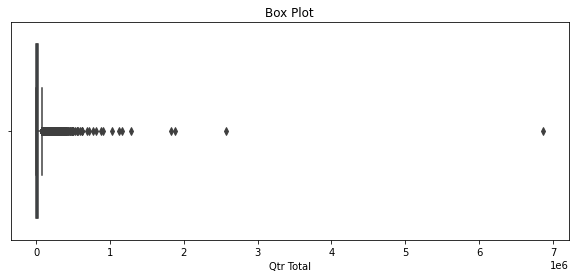

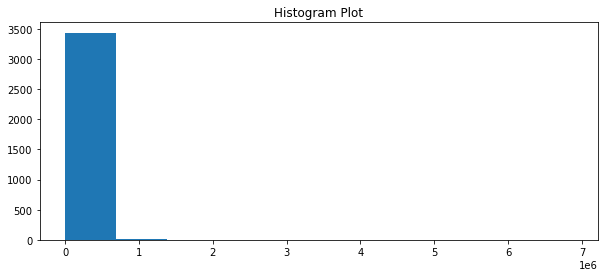

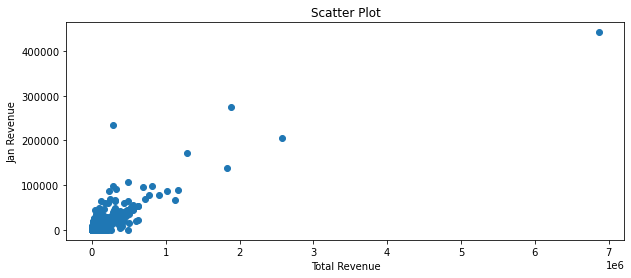

<Figure size 720x288 with 0 Axes>

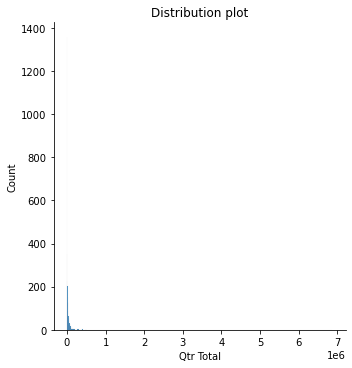

<Figure size 720x288 with 0 Axes>

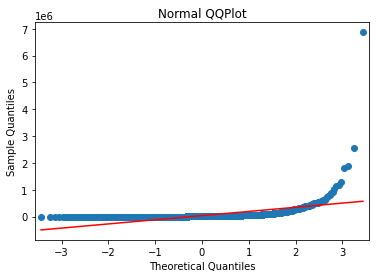

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(x=df)
    plt.show()
Box_plots(df_master['Qtr Total'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(df_master['Qtr Total'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Total Revenue')
    ax.set_ylabel('Jan Revenue')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(df_master['Qtr Total'],df_master['Jan'])

def displot_plots(df):
    plt.figure(figsize=(10, 4))
    sns.displot(x=df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
displot_plots(df_master['Qtr Total'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(df_master['Qtr Total'])